In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

C:\Users\master15\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\master15\anaconda3\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\Users\master15\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

In [3]:
import os, cv2

In [4]:
from PIL import Image

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import datasets, models, transforms

import numpy as np
import time


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # device 객체

## 모델 불러오기

In [6]:
PATH = 'C:/Users/master15/Desktop/0820resnet/Resnet_model/'

In [7]:
# Load model
nose_model = torch.load(PATH + 'model.pt')

## 데이터 전처리

In [9]:
# 데이터셋을 불러올 때 사용할 변형(transformation) 객체 정의
new_transforms = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.RandomHorizontalFlip(), # 데이터 증진(augmentation)
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화(normalization)
])

In [10]:
data_dir = 'C:/Users/master15/Desktop/0820Resnet/Resnet_model'

In [11]:
datasets = datasets.ImageFolder(os.path.join(data_dir), new_transforms)

In [12]:
dataloader = torch.utils.data.DataLoader(datasets, batch_size=4, shuffle=True, num_workers=4)

## 불러온 이미지 보기

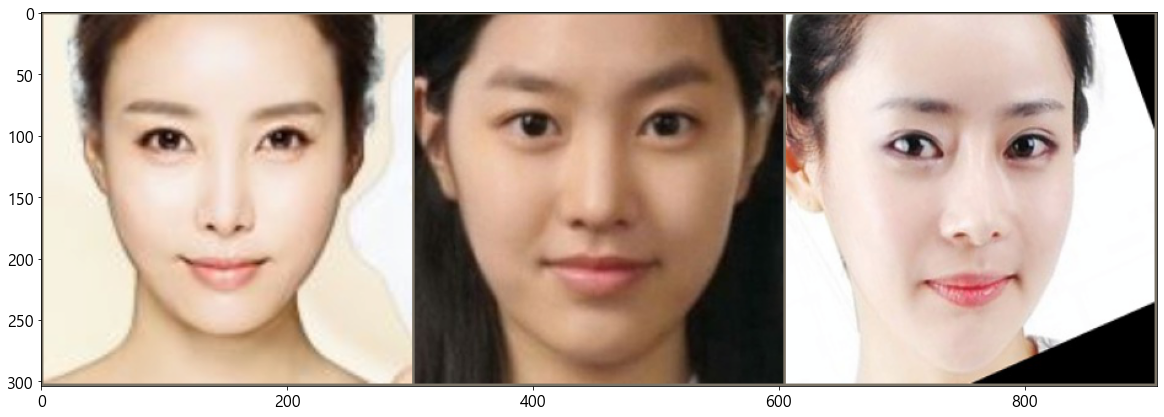

In [13]:
def imshow(input, title):
    # torch.Tensor를 numpy 객체로 변환
    input = input.numpy().transpose((1, 2, 0))
    # 이미지 정규화 해제하기
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # 이미지 출력
    plt.imshow(input)
    plt.title(title)
    plt.show()


# 학습 데이터를 배치 단위로 불러오기
iterator = iter(dataloader)

# 현재 배치를 이용해 격자 형태의 이미지를 만들어 시각화
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs)
imshow(out, title='')

In [15]:
# 학습 데이터를 배치 단위로 불러오기
iterator = iter(dataloader)
inputs, classes = next(iterator)
outputs = nose_model(inputs)
_, preds = torch.max(outputs, 1)

In [17]:
class_names=['Heart', 'Oblong', 'Oval', 'Round', 'Square']

In [18]:
# 한 배치의 첫 번째 이미지에 대하여 결과 시각화
print(f'[예측 결과: {class_names[preds[0]]}]')

[예측 결과: Oval]
